<a href="https://colab.research.google.com/github/nourozkhan/images-classification/blob/main/Image_classification_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tensorflow**

TensorFlow is a free and open-source software library for machine learning and artificial intelligence. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks.

**Matplotlib**

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

**NumPy**

NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

**Load CIFAR-10 Dataset**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 6s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
X_train.shape

(50000, 32, 32, 3)

Here we see there are 50000 training images and 10000 test images

In [ ]:
y_test.shape

(10000, 1)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

Let's label our classes by there name

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

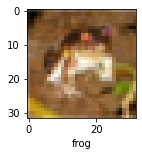

In [ ]:
plot_sample(X_train, y_train, 0)

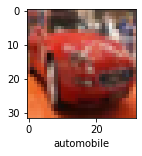

In [ ]:
plot_sample(X_train, y_train, 5)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

the reason we normalize the images is to make the model converge faster. When the data is not normalized, the shared weights of the network have different calibrations for different features, which can make the cost function to converge very slowly and ineffectively.

Normalizing the training data

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Build simple artificial neural network for image classification

**Artificial neural network**

Artificial neural network (ANN) is a computational model that consists of several processing elements that receive inputs and deliver outputs based on their predefined activation functions.

**Flatten Layer**

Flattening is converting the data into a 1-dimensional array for inputting it to the next layer. We flatten the output of the convolutional layers to create a single long feature vector. And it is connected to the final classification model, which is called a fully-connected layer.

**Dense Layer**

Dense Layer is used to classify image based on output from convolutional layers. Each Layer in the Neural Network contains neurons, which compute the weighted average of its input and this weighted average is passed through a non-linear function, called as an “activation function”.

**Activation function**

An activation function in a neural network defines how the weighted sum of the input is transformed into an output from a node or nodes in a layer of the network.

**ReLU**

The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. The rectified linear activation function overcomes the vanishing gradient problem, allowing models to learn faster and perform better.

**Softmax**

The Softmax activation function calculates the relative probabilities. That means it uses the value of probablities of each feature to determine the final probability value.

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 62s 39ms/step - loss: 1.8134 - accuracy: 0.3544
Epoch 2/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.6249 - accuracy: 0.4264
Epoch 3/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.5435 - accuracy: 0.4570
Epoch 4/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.4818 - accuracy: 0.4765
Epoch 5/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.4345 - accuracy: 0.4937


You can see that at the end of 5 epochs, accuracy is at around 49%

**Confusion Matrix**

A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class.

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.60      0.37      0.46      1000
           1       0.73      0.40      0.52      1000
           2       0.34      0.37      0.36      1000
           3       0.44      0.16      0.23      1000
           4       0.33      0.54      0.40      1000
           5       0.41      0.37      0.39      1000
           6       0.40      0.70      0.51      1000
           7       0.67      0.39      0.49      1000
           8       0.60      0.62      0.61      1000
           9       0.47      0.69      0.56      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.45     10000
weighted avg       0.50      0.46      0.45     10000



Now let us build a convolutional neural network to train our images

**Convolutional Neural Network**

A convolutional neural network (CNN) is a type of artificial neural network used in image recognition and processing that is specifically designed to process pixel data.

**Convolution Layer**

A convolution layer transforms the input image in order to extract features from it. It is also known as a convolution matrix or convolution mask. This kernel slides across the height and width of the image input and dot product of the kernel and the image are computed at every spatial position.

Keras Conv2D is a 2D Convolution Layer, this layer creates a convolution kernel that is wind with layers input which helps produce a tensor of outputs

**Max pooling**

Max pooling is a pooling operation that selects the maximum element from the region of the feature map covered by the filter. Thus, the output after max-pooling layer would be a feature map containing the most prominent features of the previous feature map.

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 45s 28ms/step - loss: 1.4447 - accuracy: 0.4799
Epoch 2/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.0794 - accuracy: 0.6219
Epoch 3/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.9598 - accuracy: 0.6639
Epoch 4/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.8748 - accuracy: 0.6976
Epoch 5/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.8045 - accuracy: 0.7218
Epoch 6/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.7518 - accuracy: 0.7386
Epoch 7/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.7007 - accuracy: 0.7574
Epoch 8/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.6541 - accuracy: 0.7702
Epoch 9/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.6133 - accuracy: 0.7853
Epoch 10/10
1563/1563 [==============================] - 43s 28m

With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.9442 - accuracy: 0.7017


[0.9442012906074524, 0.70169997215271]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.5198918e-03, 4.6938076e-04, 8.0408790e-04, 8.4557664e-01,
        2.9752475e-05, 1.4282884e-01, 2.9538893e-03, 1.1083885e-05,
        5.3671901e-03, 4.3922709e-04],
       [1.3786706e-02, 2.1238478e-03, 3.8934428e-05, 1.6141857e-06,
        6.9317099e-07, 7.3671500e-09, 2.9217766e-09, 1.7349306e-08,
        9.7951746e-01, 4.5307009e-03],
       [7.6632634e-02, 4.7477543e-02, 9.3824568e-04, 5.4812818e-03,
        7.4708005e-05, 2.1806192e-04, 3.7674825e-05, 2.3522618e-04,
        8.5033947e-01, 1.8565165e-02],
       [4.9369153e-01, 3.0839085e-03, 6.7381807e-02, 2.4464359e-03,
        1.0558861e-05, 1.1361501e-05, 7.4676286e-06, 1.5640317e-06,
        4.3330860e-01, 5.6833567e-05],
       [2.3552930e-05, 5.3290878e-05, 1.7630434e-02, 5.1280629e-02,
        2.3534594e-01, 2.1904988e-02, 6.7369330e-01, 1.2414457e-05,
        4.1822346e-05, 1.3685447e-05]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

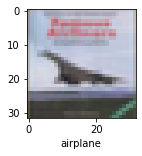

In [ ]:
plot_sample(X_test, y_test,3)

In [ ]:
classes[y_classes[3]]

'airplane'

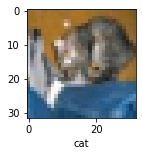

In [ ]:
plot_sample(X_test, y_test,0)

In [ ]:
classes[y_classes[0]]

'cat'